# Libraries

In [1]:
library(dagitty)
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Question

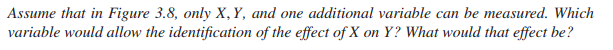

Figure 3.8:
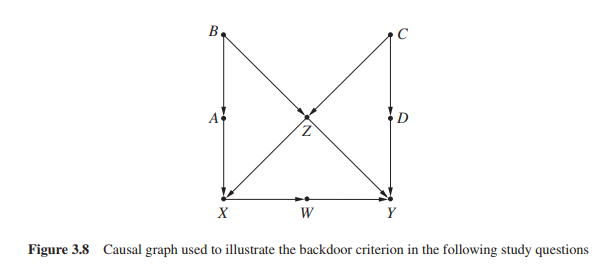

# Solution

Get the DAG:

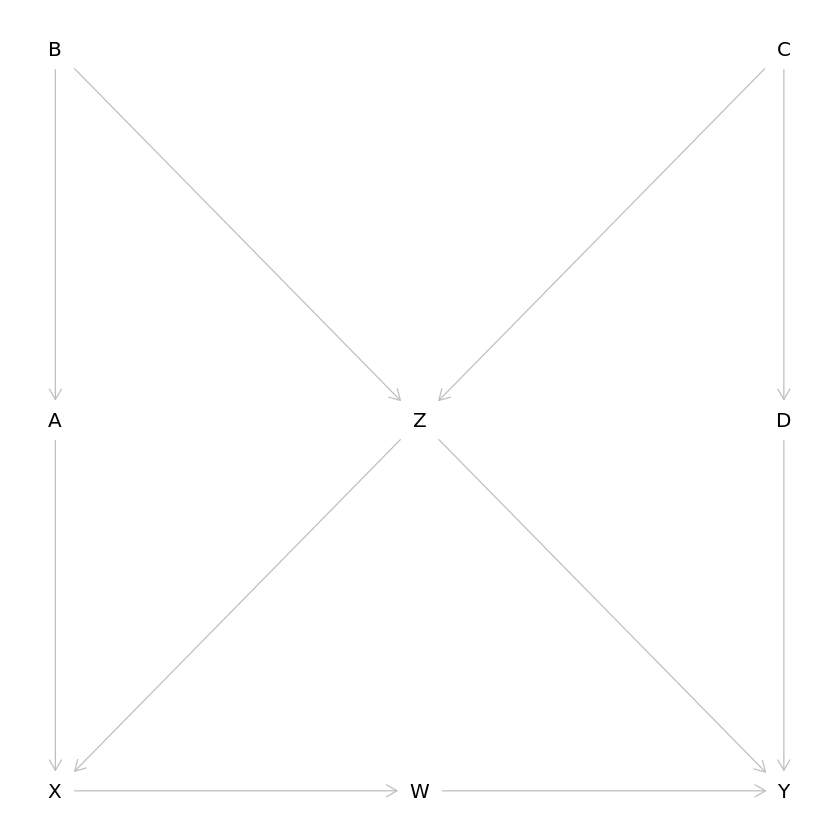

In [2]:
g <- downloadGraph("dagitty.net/m331")
plot(g)

Using the backdoor criterion:

In [3]:
adjustmentSets(g, "X", "Y")

{ D, Z }
{ C, Z }
{ B, Z }
{ A, Z }

All sets require 2 variables to be measured!

If we try the front door criterion:

Hint:

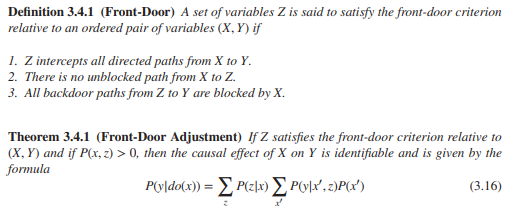

Get all the direct paths from $X$ to $Y$:

In [4]:
paths(g, "X", "Y")$paths %>%
    keep(~ str_detect(.x, "X ->")) %>%
    keep(~ !str_detect(.x, "<-"))

[1] "X -> W -> Y"

If we use $W$ as the set of variables that satisfy the front door criterion:

Is there an open path between $X$ and $W$?

In [5]:
p <- paths(g, "X", "W")
map2(p$paths, p$open, ~ list(path = .x, is_open = .y)) %>%
    discard(~ .x$path == 'X -> W') %>%
    keep(~ .x$is_open) %>%
    is_empty

[1] TRUE

Are all backdoor paths from $W$ to $Y$ blocked by $X$? 

In [6]:
p <- paths(g, "W", "Y", "X")
map2(p$paths, p$open, ~ list(path = .x, is_open = .y)) %>%
    discard(~ .x$path == 'W -> Y') %>%
    keep(~ .x$is_open) %>%
    is_empty

[1] TRUE

Therefore, $W$ satisfies the front door criterion.

Using Theorem 3.4.1:

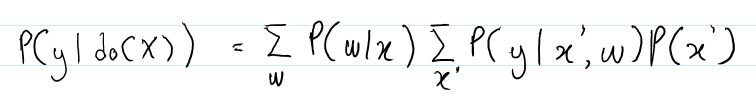